# Домашнее задание к лекции "Визуализация данных"

## Доклад о мировом счастье

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
# запишем данные csv-файлов датафреймы
df2015 = pd.read_csv('happiness/2015.csv')
df2016 = pd.read_csv('happiness/2016.csv')
df2017 = pd.read_csv('happiness/2017.csv')
df2018 = pd.read_csv('happiness/2018.csv')
df2019 = pd.read_csv('happiness/2019.csv')

### Объединим наши пять датафреймов в один **df**
Для этого надо будет выполнить следующий ряд действий:
1. Добавить во все датафреймы столбец **Year**.
1. Выбирать необходимые признаки для анализа.
1. Привести в соответствие названия празнаков (столбцов) всех пяти датафреймов.
1. Добавить в датафреймы и заполнить недостающие столбцы.
1. Объединить датафреймы.
1. Обработать пропуски.

#### Добваляем в датафреймы столбец Year

In [4]:
# создадим в этих датафреймах столбец со значением года исследования
years = range(2015, 2020)
dataframes = [df2015, df2016, df2017, df2018, df2019]

for y, df in zip(years, dataframes):
    df.insert(0, 'Year', str(y))

In [5]:
df2019.head()

,Year,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Выбираем признаки, с которыми будем в дальнейшем работать

In [6]:
col_names = ['Year','Country', 'Region', 'Happiness Rank', 'Happiness Score',
            'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Trust (Government Corruption)', 'Generosity']

В **df2015** и **df2016** названия признаков по вабранным позициям совпадают. Поэтому сразу можем объединить эти два датафрейма в датафрейм **df**.

In [7]:
df = pd.concat([df2015[col_names], df2016[col_names]], ignore_index=True)

#### Приводим в соответствие названия столбцов в датафреймах **df2017**, **df2018**, **df2019**

In [8]:
df2017.columns

Index(['Year', 'Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [9]:
df2017.rename(columns = {
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)'
}, inplace=True)

In [10]:
df2018.rename(columns = {
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Country or region': 'Country',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
}, inplace=True)

In [11]:
df2019.rename(columns = {
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'Country or region': 'Country',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)',
}, inplace=True)

#### Создаем и заполняем значениями столбец **Region**
В датафреймах **df2017**, **df2018** и **df2019** отсутсвует признак **Region**. Создадим и заполним его на основе данных в датафрейма **df**. Для этого:
- создадим на остове датафрейма **df** датафрейм-справочник **country_region**,
- соединим каждый из датафреймов **df2017**, **df2018** и **df2019** со справочником с параметром **how='left'**

In [12]:
# создаеь датафрейм-справочник
country_region = df[['Country', 'Region']].drop_duplicates()
country_region.head()

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [13]:
df2017 = df2017.merge(country_region, on='Country', how='left')

In [14]:
df2018 = df2018.merge(country_region, on='Country', how='left')

In [15]:
df2019 = df2019.merge(country_region, on='Country', how='left')

#### Объединяем датафреймы

In [16]:
df = pd.concat([df, df2017[col_names], df2018[col_names], df2019[col_names]], ignore_index=True)

In [17]:
df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Country                        782 non-null    object 
 2   Region                         774 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 67.3+ KB


#### Обрабатываем пропуски

Регионы заполним вручную:

In [19]:
df.loc[df.Country == 'Northern Cyprus', 'Region'] = 'Western Europe'

In [20]:
df.loc[df.Country == 'North Macedonia', 'Region'] = 'Central and Eastern Europe'

In [21]:
df.loc[df.Country == 'Hong Kong S.A.R., China', 'Region'] = 'Eastern Asia'

In [22]:
df.loc[df.Country == 'Taiwan Province of China', 'Region'] = 'Eastern Asia'

In [23]:
df.loc[df.Country == 'Gambia', 'Region'] = 'Sub-Saharan Africa'

In [24]:
df.loc[df.Country == 'Trinidad & Tobago', 'Region'] = 'Latin America and Caribbean'

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Country                        782 non-null    object 
 2   Region                         782 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 67.3+ KB


А пропуск в столбце **Trust (Government Corruption)** заполним медианным значением по региону:

In [26]:
df.groupby('Region')['Trust (Government Corruption)'].median()

Region
Australia and New Zealand          0.368185
Central and Eastern Europe         0.040904
Eastern Asia                       0.078285
Latin America and Caribbean        0.086000
Middle East and Northern Africa    0.114381
North America                      0.223136
Southeastern Asia                  0.095071
Southern Asia                      0.092227
Sub-Saharan Africa                 0.085410
Western Europe                     0.225400
Name: Trust (Government Corruption), dtype: float64

In [27]:
df['Trust (Government Corruption)'] = df['Trust (Government Corruption)'].fillna(df.groupby('Region')['Trust (Government Corruption)'].transform('median'))

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Country                        782 non-null    object 
 2   Region                         782 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  782 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 67.3+ KB


**Результат:**
- датафрейм **df** содержит 782 записи по 11 признакам;
- значения в датафрейме представлены корректно;
- пропусков нет.

### График "Топ-5 стран с самым высоким уровнем рейтинга счастья по годам"

In [29]:
pivot_table_top5 = df.loc[df['Happiness Rank'] < 6].pivot_table(
    index='Year',
    columns='Country',
    values='Happiness Score'
)
pivot_table_top5

Country,Canada,Denmark,Finland,Iceland,Netherlands,Norway,Switzerland
Year,,,,,,,
2015,7.427,7.527,NaN,7.561,NaN,7.522,7.587
2016,NaN,7.526,7.413,7.501,NaN,7.498,7.509
2017,NaN,7.522,7.469,7.504,NaN,7.537,7.494
2018,NaN,7.555,7.632,7.495,NaN,7.594,7.487
2019,NaN,7.600,7.769,7.494,7.488,7.554,NaN


<Axes: title={'center': 'Топ-5 стран с самым высоким уровнем рейтинга счастья'}, xlabel='Год исследования'>

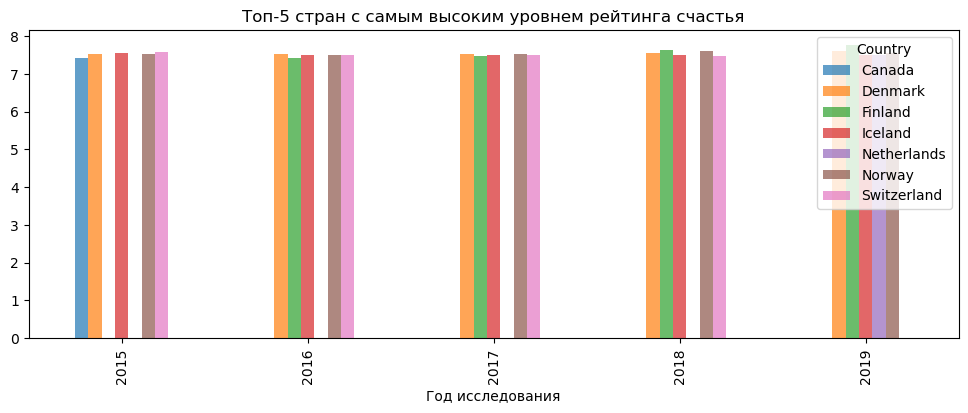

In [30]:
pivot_table_top5.plot(
    kind='bar',
    figsize=(12, 4),
    # stacked=True,
    alpha=0.7,
    title='Топ-5 стран с самым высоким уровнем рейтинга счастья',
    xlabel='Год исследования'
)

**Вывод:** На протяжении пяти лет наблюдений по рейтингу счастья лидируют страны западной европы, лиш в 2015 году в пятерку входила Канада.

### График распределения рейтинга счастья

Text(0, 0.5, 'Частота')

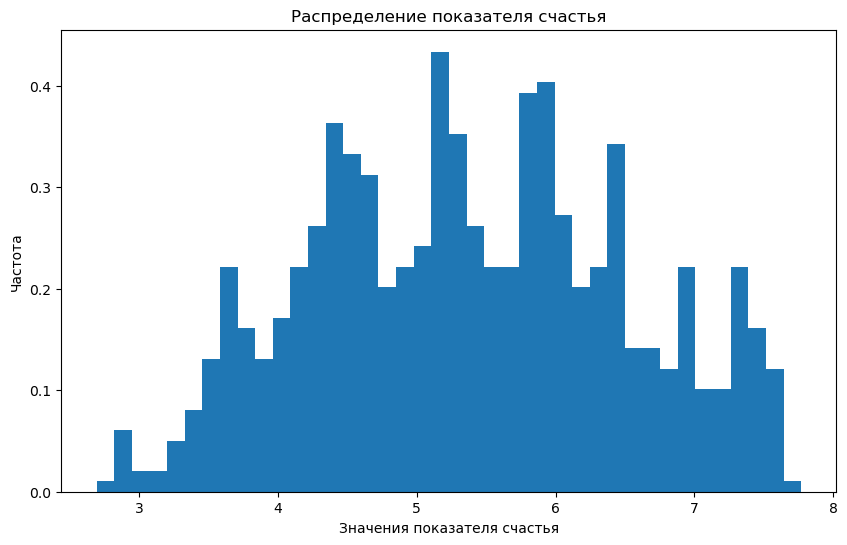

In [31]:
df['Happiness Score'].plot(kind='hist',
                           title='Распределение показателя счастья',
                           bins=40,
                           density=True
)
plt.xlabel('Значения показателя счастья')
plt.ylabel('Частота')

**Вывод:** Распределение далеко от нормального. На графике определяется множество пиков, которые, возможно, свидетельствуют о наличии кластеров, состоящих из наборов стран с раздичными уровнями показателя счастья.

### Коробчатая диаграмма показателя счастья по регионам

Text(0, 0.5, 'Значения показателя счастья')

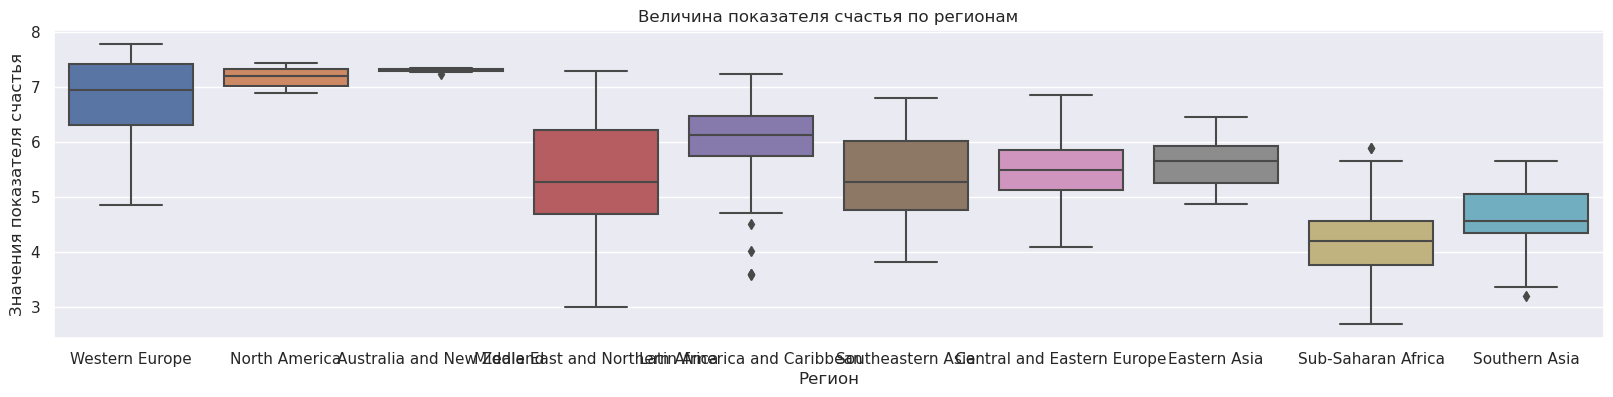

In [32]:
sns.set(rc={'figure.figsize':(20, 4)})
sns.boxplot(
    x='Region',
    y='Happiness Score',
    data=df
)
plt.title('Величина показателя счастья по регионам')
plt.xlabel('Регион')
plt.ylabel('Значения показателя счастья')

**Вывод:** Наиболее высокий показатель уровня счастья отмечается в следующих регионах: Австралия и Новая Зеландия, Северная Америка, Западная Европа. В странах Африки и Латинской Америки наблюдается довольно широкий разброс значений.

### Сравним распределение показателя счастья в двух регионах Европы

Text(0, 0.5, 'Частота')

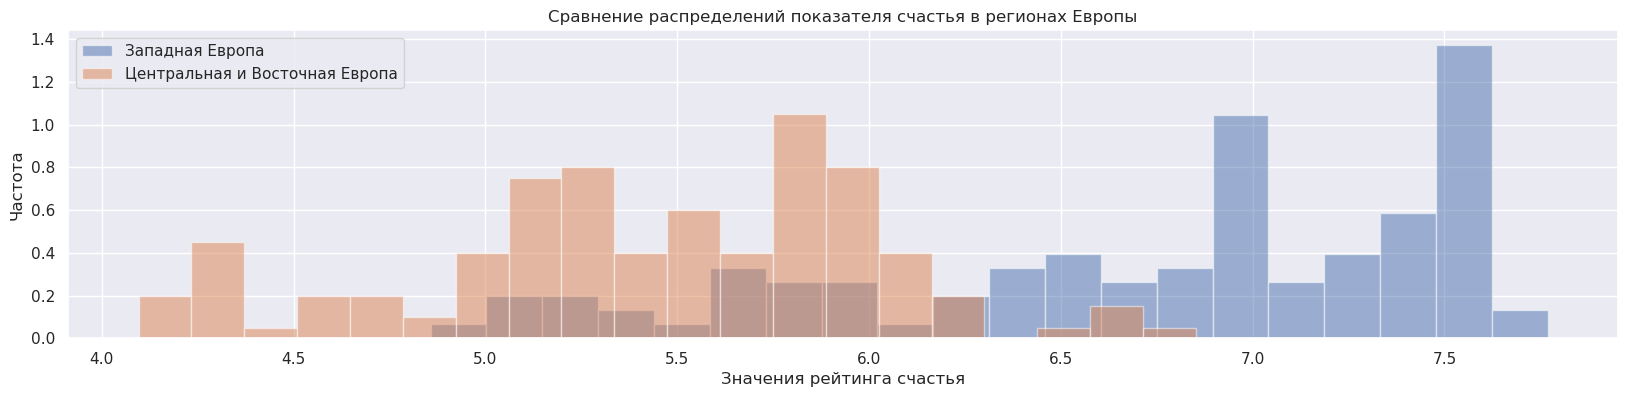

In [33]:
west_eu = df.loc[df.Region == 'Western Europe']
centr_east_eu = df.loc[df.Region == 'Central and Eastern Europe']
west_eu['Happiness Score'].plot(
    kind='hist',
    alpha = 0.5,
    bins = 20,
    density = True
)
centr_east_eu['Happiness Score'].plot(
    kind='hist',
    alpha = 0.5,
    bins = 20,
    density = True
)
plt.legend(['Западная Европа', 'Центральная и Восточная Европа'], loc='upper left')
plt.title('Сравнение распределений показателя счастья в регионах Европы')
plt.xlabel('Значения рейтинга счастья')
plt.ylabel('Частота')

**Вывод:** В большинстве стран Западной Европы показатель рейтинга счастья выше, чем в странах Центральной и Восточной Европы

### Строим Pair Plot

/home/andrew/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


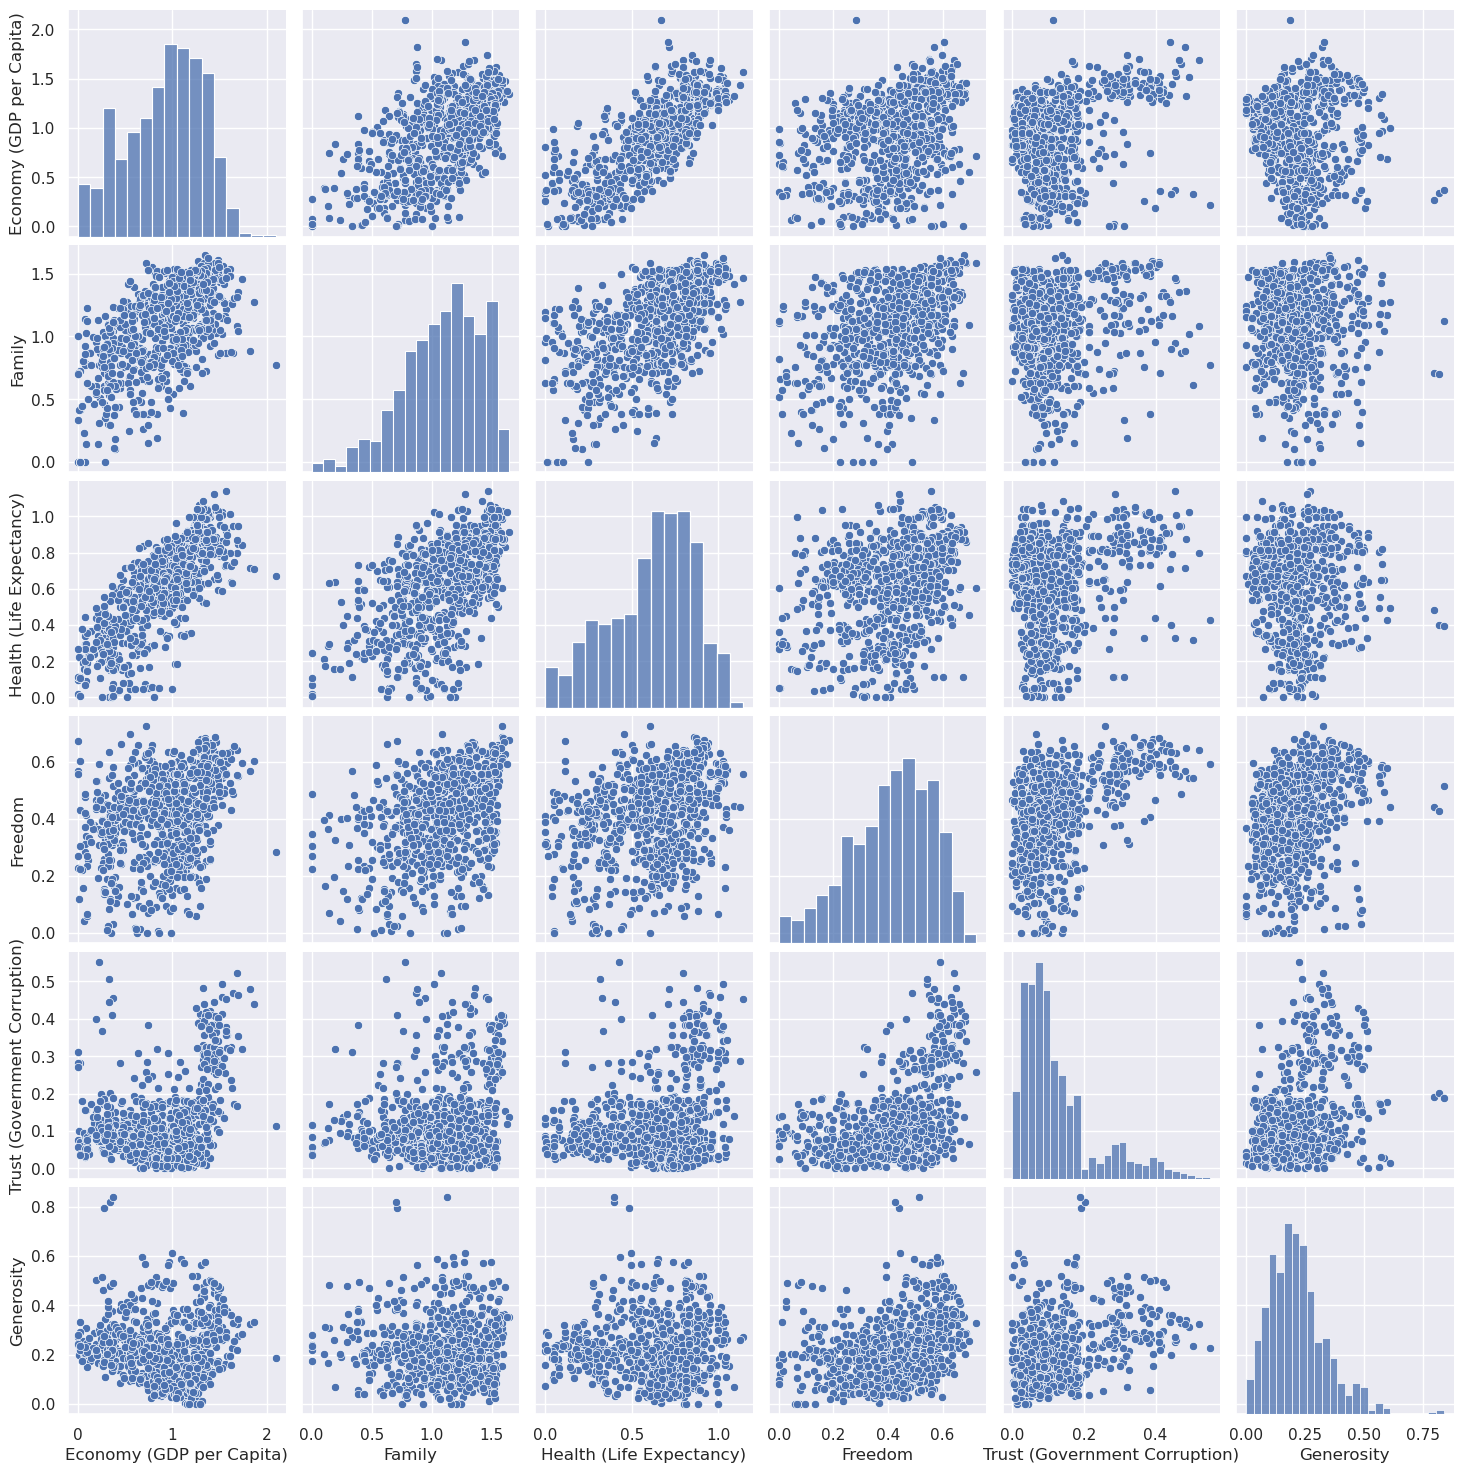

In [34]:
sns.pairplot(df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                 'Freedom', 'Trust (Government Corruption)', 'Generosity']])

**Вывод:** Обращает на себя внимание возможная связь между показателями развития экономики и здравоохранения.

### Тепловая карта корреляции между показателями, оказывающими влияние на уровень показателя счастья

In [35]:
corr_df = df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].corr()

<Axes: >

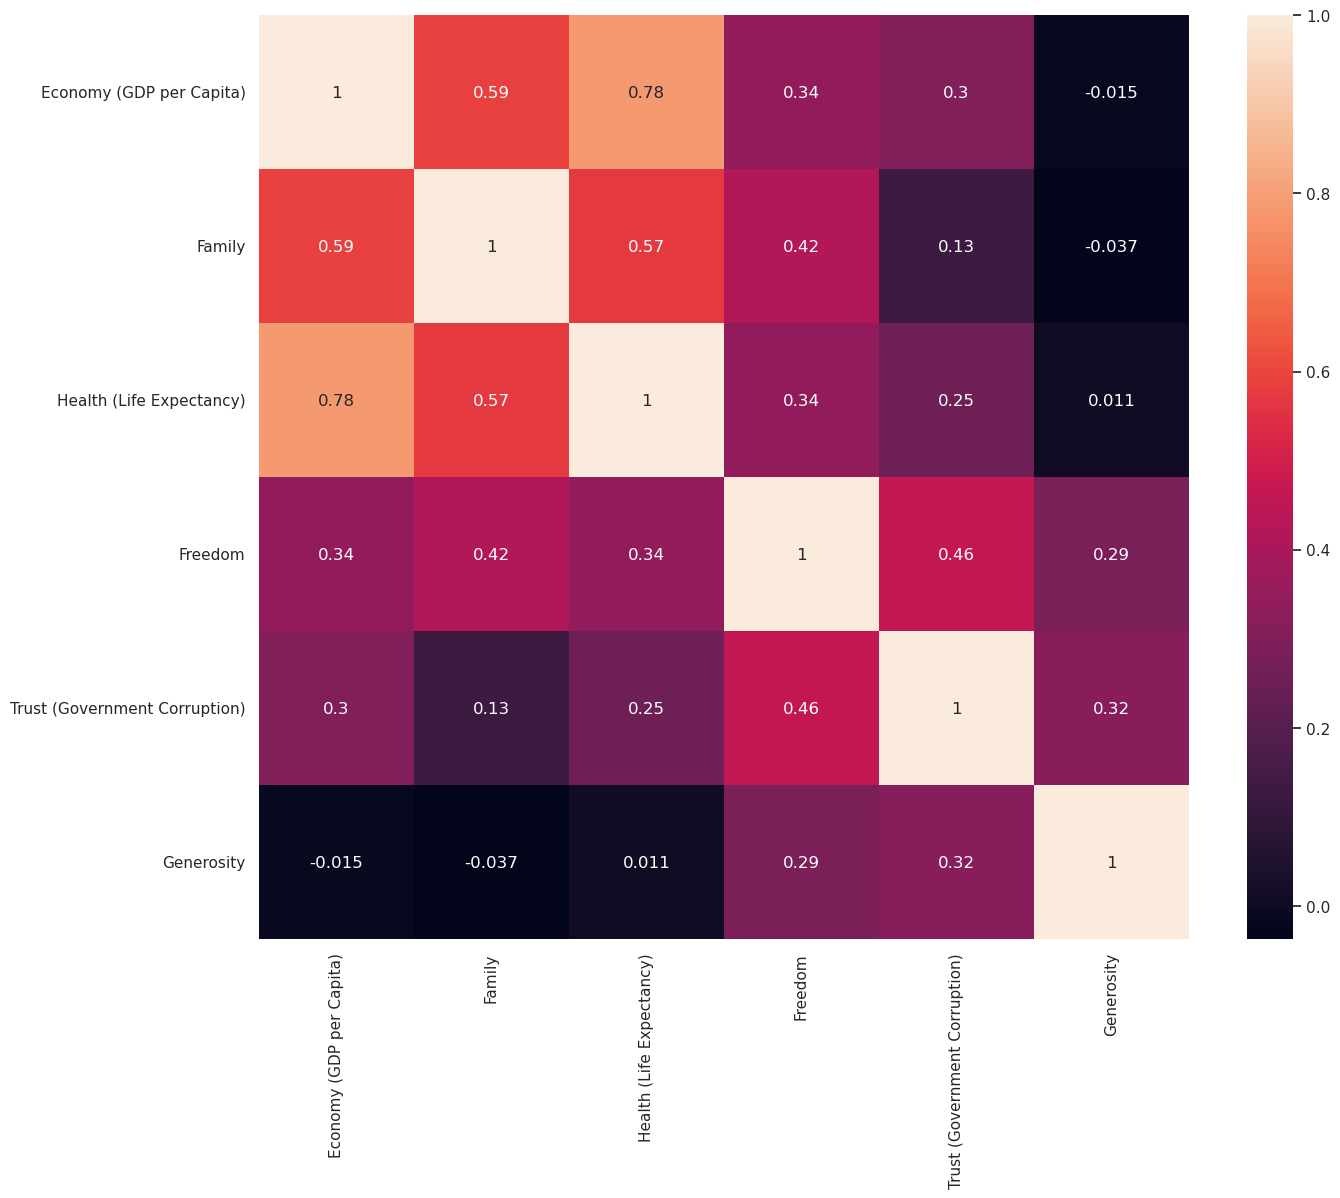

In [36]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(corr_df, annot = True)